#Dog vs Cat Transfer Learning

A simple model based on determining whether an image is a dog or a cat.

Utilizes Kaggle's [Dogs vs Cats Redux: Kernels Edition Dataset.](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)

#Imports

In [ ]:
#Need to force older version of tensorflow as the code was written in tf1.
%tensorflow_version 1.x
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

import os
import random
import gc

from IPython.display import Image

from sklearn.model_selection import train_test_split

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model



TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
# Use these to get the test and training files
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 271M/271M [00:02<00:00, 91.2MB/s]
100% 271M/271M [00:02<00:00, 97.4MB/s]
 99% 540M/544M [00:06<00:00, 97.9MB/s]
100% 544M/544M [00:06<00:00, 91.5MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 170MB/s]


In [ ]:
#Use these to unzip the files
!unzip 'train.zip'
!unzip 'test.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            
  inflating: test/5520.jpg           

#Pre-Processing
Here, we divide the dataset into test and training while doing several adjustments to the data in order to pass it through the model.

In [ ]:
trainDir = 'train'
testDir = 'test'

trainDogs = ['train/{}'.format(i) for i in os.listdir(trainDir) if 'dog' in i] #get the doggos
trainCats = ['train/{}'.format(i) for i in os.listdir(trainDir) if 'cat' in i] #get the kitties

testImgs = ['test{}'.format(i) for i in os.listdir(testDir)] #get test images

trainImgs = trainDogs + trainCats
random.shuffle(trainImgs)

del trainDogs
del trainCats
gc.collect() #I include gc.collect to make sure there is enough ram

37

In [ ]:
#image size declerations
nrows = 150
ncolumns = 150
channels = 3

In [ ]:
def rpImages(images):
  #Returns x and y
  #Where X is resized images and Y is an array of elements
  x = []
  y = []
  
  lent = len(images)
  i = 1
  #classification 0 for cat, 1 for dog
  for image in images:
    x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC)) # read the image
    print("Going through image " + str(i) + "/" + str(lent))
    if 'dog' in image:
      y.append(1)
    if 'cat' in image:
      y.append(0)
    i += 1
  return x, y

Streaming output truncated to the last 5000 lines.
Going through image 20007/25000
Going through image 20008/25000
Going through image 20009/25000
Going through image 20010/25000
Going through image 20011/25000
Going through image 20012/25000
Going through image 20013/25000
Going through image 20014/25000
Going through image 20015/25000
Going through image 20016/25000
Going through image 20017/25000
Going through image 20018/25000
Going through image 20019/25000
Going through image 20020/25000
Going through image 20021/25000
Going through image 20022/25000
Going through image 20023/25000
Going through image 20024/25000
Going through image 20025/25000
Going through image 20026/25000
Going through image 20027/25000
Going through image 20028/25000
Going through image 20029/25000
Going through image 20030/25000
Going through image 20031/25000
Going through image 20032/25000
Going through image 20033/25000
Going through image 20034/25000
Going through image 20035/25000
Going through image 2

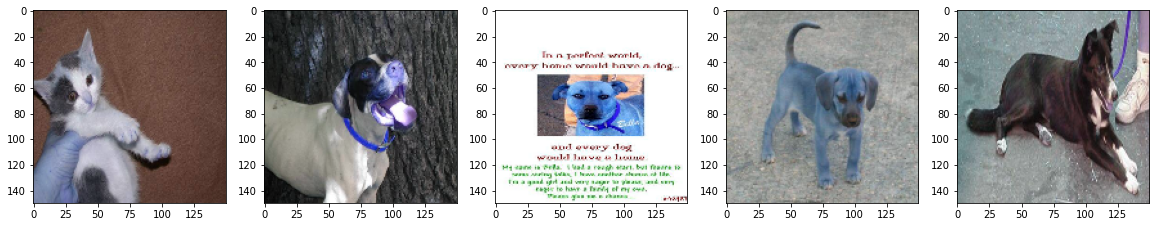

In [ ]:
#pulling images and labels to x and y
x, y = rpImages(trainImgs)
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
  plt.subplot(5 / columns + 1, columns, i + 1)
  plt.imshow(x[i])
  print(y[i])

In [ ]:
#convert list to np array
x = np.array(x)
y = np.array(y)

print("Shape of train images is:", x.shape)
print("Shape of test iamges is:", y.shape)

del trainImgs
gc.collect()

Shape of train images is: (25000, 150, 150, 3)
Shape of test iamges is: (25000,)


11693

In [ ]:
xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size=0.2, random_state = 2)

print("Shape of train image:", xTrain.shape)
print("Shape of validation image:", xVal.shape)
print("Shape of train lables:", yTrain.shape)
print("Shape of val labes:", yVal.shape)


Shape of train image: (20000, 150, 150, 3)
Shape of validation image: (5000, 150, 150, 3)
Shape of train lables: (20000,)
Shape of val labes: (5000,)


In [ ]:
ntrain = len(xTrain)
nval = len(xVal)

batchsize = 32

In [ ]:
del x
del y
gc.collect()

0

In [ ]:
from keras.applications import InceptionResNetV2

#pull resNet to serve as a base for the model using imagenet weights
resNet = InceptionResNetV2(weights = 'imagenet', include_top = False, input_shape = (150,150,3))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


219062272/219055592 [==============================] - 5s 0us/step


In [ ]:
#add flattening, relu, and sigmoid
model = models.Sequential()
model.add(resNet)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
print('# of trainable weights after freezing the conv base: ', len(model.trainable_weights))

# of trainable weights after freezing the conv base:  492


In [ ]:
conBase.trainable = False
print('# of trainable weights after freezing the conv base:', len(model.trainable_weights))


# of trainable weights after freezing the conv base: 4


In [ ]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#We want to use binary crossentropy as this it's a binary classification problem
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5), metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
#this here is to move images to add further randomness to the data
#this helps decrease the overtraining
trainDataGen = ImageDataGenerator(rescale = 1./255,
                                 rotation_range = 40,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)
valDataGen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainGen = trainDataGen.flow(xTrain, yTrain, batch_size = batchsize)
valGen = valDataGen.flow(xVal, yVal, batch_size = batchsize)

In [ ]:
history = model.fit_generator(trainGen,
                             steps_per_epoch=ntrain // batchsize,
                             epochs = 20,
                             validation_data = valGen,
                             validation_steps = nval // batchsize)


Epoch 1/20
625/625 [==============================] - 119s 191ms/step - loss: 0.4113 - accuracy: 0.8021 - val_loss: 0.3167 - val_accuracy: 0.9519
Epoch 2/20
625/625 [==============================] - 103s 165ms/step - loss: 0.3516 - accuracy: 0.8443 - val_loss: 0.4838 - val_accuracy: 0.9428
Epoch 3/20
625/625 [==============================] - 103s 164ms/step - loss: 0.3373 - accuracy: 0.8496 - val_loss: 0.0118 - val_accuracy: 0.9485
Epoch 4/20
625/625 [==============================] - 102s 163ms/step - loss: 0.3261 - accuracy: 0.8589 - val_loss: 0.2300 - val_accuracy: 0.9557
Epoch 5/20
625/625 [==============================] - 102s 163ms/step - loss: 0.3184 - accuracy: 0.8608 - val_loss: 0.0063 - val_accuracy: 0.9503
Epoch 6/20
625/625 [==============================] - 102s 163ms/step - loss: 0.3142 - accuracy: 0.8620 - val_loss: 0.3520 - val_accuracy: 0.9555
Epoch 7/20
625/625 [==============================] - 103s 164ms/step - loss: 0.3186 - accuracy: 0.8582 - val_loss: 0.0065 

In [ ]:
model.save('TransferLearn.h5')
model.save_weights('TransferWeights.h5')
model = load_model('TransferLearn.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:
tImages = ['test/{}'.format(i) for i in os.listdir(testDir)]
random.shuffle(tImages)
xTest, yTest = rpImages(tImages[0:10])
xT = np.array(xTest)
test_datagen = ImageDataGenerator(rescale=1./255)

Going through image 1/10
Going through image 2/10
Going through image 3/10
Going through image 4/10
Going through image 5/10
Going through image 6/10
Going through image 7/10
Going through image 8/10
Going through image 9/10
Going through image 10/10


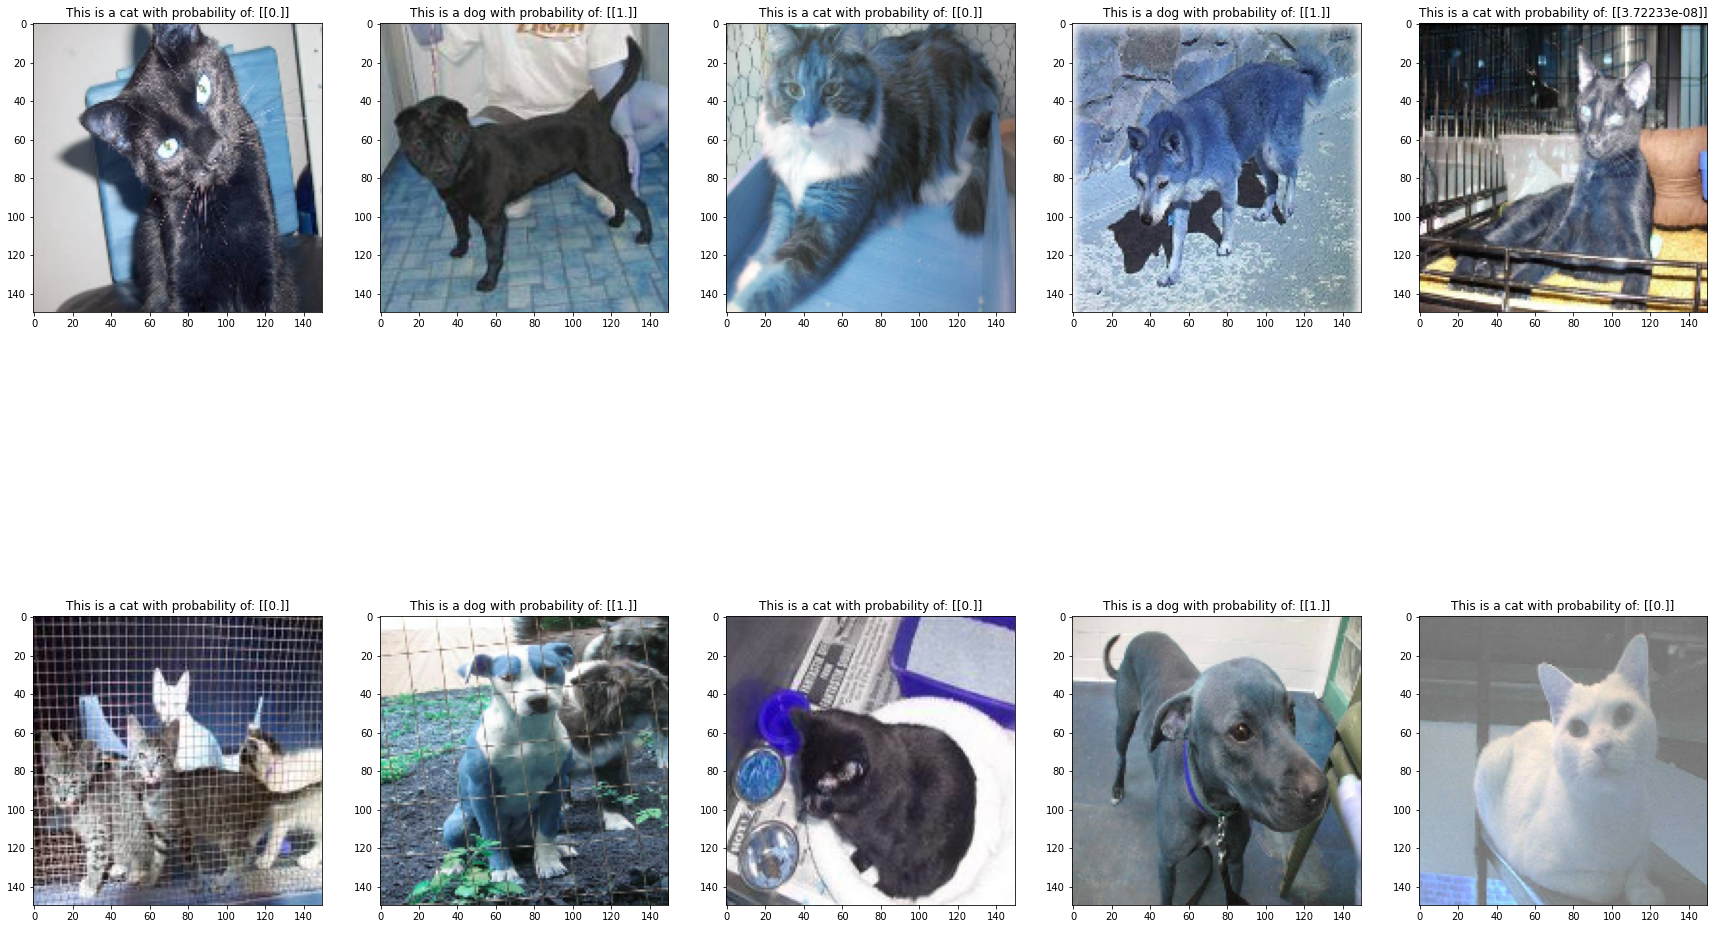

In [ ]:

i = 0
textLables = []
plt.figure(figsize = (30,20))
for batch in test_datagen.flow(xT, batch_size = 1):
  pred = model.predict(batch)
  if pred > 0.5:
    textLables.append('dog')
  else:
    textLables.append('cat')
  plt.subplot(5/columns + 1, columns, i + 1)
  plt.title('This is a ' + textLables[i] + ' with probability of: ' + str(pred))
  imgplot = plt.imshow(batch[0])
  i += 1
  if i % 10 == 0:
    break
plt.show()
  

This part here is to see what the machine guessed incorrectly. So, we're going to grab 5 different photos that is incorrect.

In [ ]:
#This one here is to determine wrong guesses made my the machine
xTest, yTest = rpImages(tImages)
xT = np.array(xTest)
predictC = model.predict(xT)
# yT = np.arra(yTest)
print(len(predictC))
print(len(yTest))
print(predictC)
print(yT)


Streaming output truncated to the last 5000 lines.
Going through image 7512/12500
Going through image 7513/12500
Going through image 7514/12500
Going through image 7515/12500
Going through image 7516/12500
Going through image 7517/12500
Going through image 7518/12500
Going through image 7519/12500
Going through image 7520/12500
Going through image 7521/12500
Going through image 7522/12500
Going through image 7523/12500
Going through image 7524/12500
Going through image 7525/12500
Going through image 7526/12500
Going through image 7527/12500
Going through image 7528/12500
Going through image 7529/12500
Going through image 7530/12500
Going through image 7531/12500
Going through image 7532/12500
Going through image 7533/12500
Going through image 7534/12500
Going through image 7535/12500
Going through image 7536/12500
Going through image 7537/12500
Going through image 7538/12500
Going through image 7539/12500
Going through image 7540/12500
Going through image 7541/12500
Going through image

In [ ]:
yT = 

0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
